In [58]:
import os
import requests
import lxml.html as lh
import pandas as pd
#import argparse

#parser = argparse.ArgumentParser()
#parser.add_argument("-i", "--serid", help="Pass the serId specified on the http://ipeadata.gov.br/ListaSeries.aspx?TEMID=X",
#                    dest='id', required=True)
#args = parser.parse_args()

#serId = args.id

In [59]:
serId = 1927452361

In [68]:
url = "http://ipeadata.gov.br/ExibeSerie.aspx?serid={id}".format(id = serId)
page = requests.get(url)
doc = lh.fromstring(page.content)
tr_elements = doc.xpath('//tr')
data = [[a.text_content() for a in element] for element in tr_elements]
df = pd.DataFrame(data)
df.columns = [str(x) for x in range(len(df.columns))]
df.drop(columns = ["2"], inplace = True)
df.columns = ["date", "qty"]
df.head()

,date,qty
0,,Volatilidade do Ã­ndice de aÃ§Ãµes: Ibovespa -...
1,,Loading…
2,\r\n\t\t\t\r\n\t\t\t\t\r\n\t\t\t\t\t\r\n\t\t\t...,None
3,\r\n\t\t\t\t\t\r\n\t\t\t\t\t\tData\r\n\t\t\t\t...,\r\n\t\t\t\t\t\r\n\t\t\t\t\t\tÃndice de aÃ§Ãµ...
4,Data,


In [69]:
df[20:30]

,date,qty
20,03/04/2020,"0,0000"
21,02/04/2020,"0,0000"
22,01/04/2020,"0,0000"
23,31/03/2020,"0,0000"
24,30/03/2020,"0,0000"
25,27/03/2020,"0,0000"
26,26/03/2020,"0,0000"
27,25/03/2020,"0,0000"
28,24/03/2020,"0,0000"
29,23/03/2020,"0,0000"


In [75]:
def remove_special_chars(series):
    return (
        series
        .astype(str)
        .apply(lambda x: x.replace(",","").replace(".","").replace("/","").replace("-",""))
    )

df["qty"] = remove_special_chars(df["qty"])

filters = df["qty"].apply(str.isnumeric)
df = df[filters].copy()
df["qty"] = df["qty"].astype(float)
df["date"] = pd.to_datetime(df["date"].astype(str))
df.head()

,date,qty
6,2020-04-27,0.0
7,2020-04-24,0.0
8,2020-04-23,0.0
9,2020-04-22,0.0
10,2020-04-20,0.0


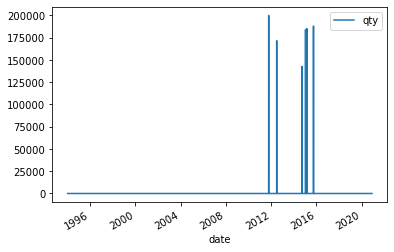

In [76]:
df.set_index("date").plot()

In [ ]:
name = 
df.to_csv("/home/ubuntu/notebooks/\[DATA\]/{}.csv".format(name))